In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
nopath='/content/drive/MyDrive/brain_tumor_dataset /no/1 no.jpeg'

In [70]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

In [71]:
noi=Image.open(nopath)

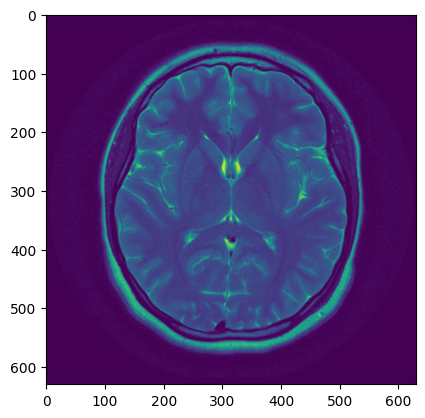

In [72]:
noia=asarray(noi) #convertion from image to array
plt.imshow(noia) #extracting the image and showing

In [73]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
dataset_path ='/content/drive/MyDrive/brain_tumor_dataset '
yes_path = os.path.join(dataset_path, 'yes')
no_path = os.path.join(dataset_path, 'no')

In [83]:
img_height, img_width = 224, 224
batch_size = 32

# Data Augmentation and Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [84]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:

# Train the model without early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10,  # Number of epochs to train for
    validation_data=validation_generator
)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 26s 5s/step - accuracy: 0.9013 - loss: 0.3294 - val_accuracy: 0.6875 - val_loss: 0.5615
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.8750 - loss: 0.3636 - val_accuracy: 0.7500 - val_loss: 0.5207
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.8998 - loss: 0.2236 - val_accuracy: 0.8438 - val_loss: 0.5579
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.8750 - loss: 0.2912 - val_accuracy: 0.8438 - val_loss: 0.5575
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.9209 - loss: 0.1806 - val_accuracy: 0.8750 - val_loss: 0.4337
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 330ms/step - accuracy: 0.9062 - loss: 0.1974 - val_accuracy: 0.8438 - val_loss: 0.4990
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9591 - loss: 0.1592 - val_accuracy: 0.8125 - val_loss: 0.5632
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9062 - loss: 0.1788 - val_accuracy: 0.8750 - val_loss: 0.2050
Ep

In [87]:
model.save('/content/drive/MyDrive/brain_tumor_cnn_model.h5')

In [89]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/brain_tumor_cnn_model.h5')

In [93]:
notest='/content/drive/MyDrive/brain_tumor_dataset /no/15 no.jpg'

In [94]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(image_path, img_height=224, img_width=224):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Rescale the image (same as during training)
    return img_array

In [95]:
img=load_and_preprocess_image(notest,224,224)

In [96]:
def predict_image(model, image_path):
    img_array = load_and_preprocess_image(image_path)
    prediction = model.predict(img_array)
    return prediction

In [97]:
prediction=predict_image(model,notest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


In [98]:
def display_prediction(image_path, prediction):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')

    # Use argmax to find the index of the highest probability
    prediction_class = np.argmax(prediction, axis=-1)
    class_label = 'Tumor' if prediction_class == 1 else 'No Tumor'

    plt.title(f"Prediction: {class_label}")
    plt.show()

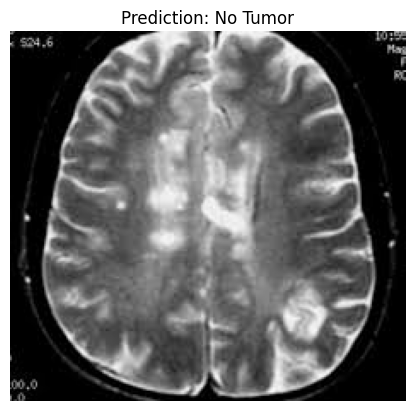

In [99]:
display_prediction(notest,prediction)

In [100]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

In [101]:
!pip install --upgrade gradio

In [102]:
import gradio as gr

In [103]:
def load_and_preprocess_image(img, img_height=224, img_width=224):
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [104]:
def predict_image(image):
    img_array = load_and_preprocess_image(image)
    prediction = model.predict(img_array)
    print("Raw model prediction:", prediction)

    if prediction.shape[1] == 1:
        class_label = 'Tumor' if prediction[0][0] >= 0.5 else 'No Tumor'
    else:
        prediction_class = np.argmax(prediction, axis=-1)
        class_label = 'Tumor' if prediction_class == 1 else 'No Tumor'

    return class_label

In [105]:
interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type='pil'),
    outputs=gr.Textbox()
)


In [106]:
# Launch the interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://81fd5a0e68edb72b58.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
